In [17]:
import pandas as pd 
import datetime 
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error 

def parser(x): 
    if x.index == 35:
        return
    return datetime.datetime.strptime("190"+x, '%Y-%m') 
 

series = pd.read_csv('sales-of-shampoo.csv', header=0, parse_dates=[1], index_col=0, squeeze=True, date_parser=parser) 

In [18]:
series.index = series['Month']
series.drop(columns=['Month'],inplace=True)
series

,Sales of shampoo over a three year period
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3
1901-06-01,168.5
1901-07-01,231.8
1901-08-01,224.5
1901-09-01,192.8


In [19]:
series.describe()

,Sales of shampoo over a three year period
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


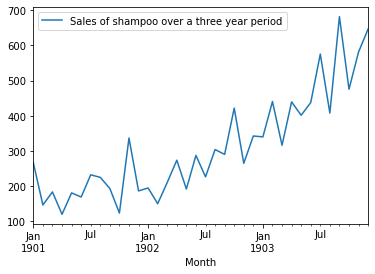

In [20]:
series.plot();

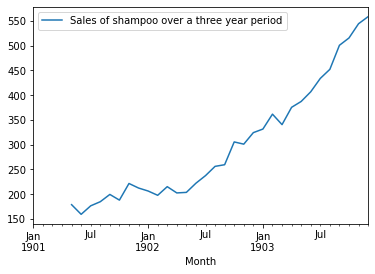

In [21]:
moving_average_series=series.rolling(window=5).mean()  # window: This is the number of observations used for calculating the statistic. 
moving_average_series.plot();

In [22]:
sm.stats.durbin_watson(series) # very less correlation

array([0.09548538])

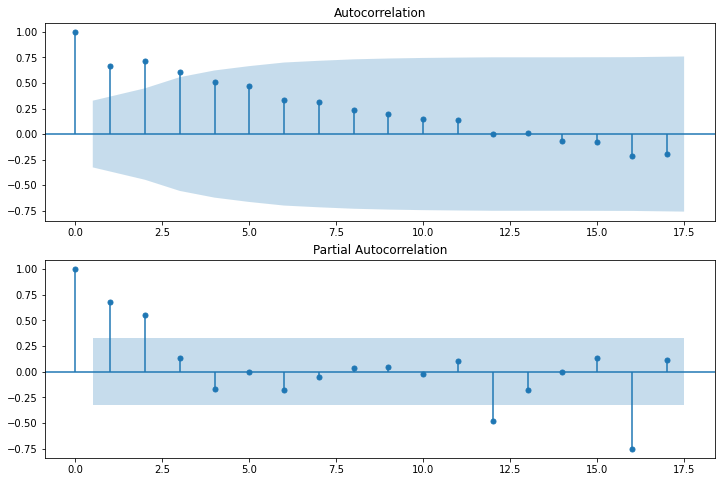

In [23]:

%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series.values.squeeze(), lags=17, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series, lags=17, ax=ax2)

In [24]:
training_data=series[0:24]
test_data=series[24:]

In [ ]:
# ARIMA(training_data, )

In [62]:
arima= ARIMA(training_data, order=(2,2,1))

c:\users\syed rahim saqib\python_miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\syed rahim saqib\python_miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [63]:
model=arima.fit()
model.aic

261.82379718635656

In [64]:
pred= model.forecast(steps=12)[0]
pred

array([341.86842026, 365.39748156, 385.13057181, 405.81230611,
       428.30879871, 451.17873147, 475.39233532, 500.43640843,
       526.54852545, 553.62914899, 581.71630543, 610.79689821])

In [65]:
from sklearn.metrics import mean_squared_error

In [66]:
np.sqrt(mean_squared_error(test_data,pred))

72.28881496633504

### Thank you